# Deutsch-Josza Algorithm

In this section, we first introduce the Deutsch-Josza problem, and classical and quantum algorithms to solve it. We then implement the quantum algorithm using Qiskit, and run on a simulator and device.

## Contents

1. [Introduction](#introduction)
   - [Deutsch-Josza Problem](#djproblem)
   - [Deutsch-Josza Algorithm](#djalgorithm)

2. [Example](#example)

3. [Qiskit Implementation](#implementation)
   - [Simulation](#simulation)
   - [Device](#device)

4. [Problems](#problems)

5. [References](#references)

## 1. Introduction <a id='introduction'></a>

The Deutsch-Josza algorithm, first introduced in Reference [1], was the first example of a quantum algorithm that performs better than the best classical algorithm. It showed that there can be advantages in using a quantum computer as a computational tool for a specific problem.

### 1a. Deutsch-Josza Problem <a id='djproblem'> </a>

We are given a hidden Boolean function $f$, which takes as input a string of bits, and returns either $0$ or $1$, that is 
<center>$f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ , where } x_n \textrm{ is } 0 \textrm{ or } 1$.

The property of the given Boolean function is that it is guaranteed to either be balanced or constant. A constant function returns all $0$'s or all $1$'s for any input, while a balanced function returns $0$'s for exactly half of all inputs and $1$'s for the other half. Our task is to determine whether the given function is balanced or constant. 

Note that the Deutsch-Josza problem is an $n$-bit extension of the single bit Deutsch problem. 

### 1b. Deutsch-Josza Algorithm <a id='djalgorithm'> </a>

#### Classical Solution

Classically, in the best case, two queries to the oracle can determine if the hidden Boolean function, $f(x)$, is balanced: 
e.g. if we get both $f(0,0,0,...)\rightarrow 0$ and $f(1,0,0,...) \rightarrow 1$, then we know the function is balanced as we have obtained the two different outputs.  

In the worst case, if we continue to see the same output for each input we try, we will have to check exactly half of all possible inputs plus one in order to be certain that $f(x)$ is constant. Since the total number of possible inputs is $2^n$, this implies that we need $2^{n-1}+1$ trial inputs to be certain that $f(x)$ is constant in the worst case. For example, for a $4$-bit string, if we checked $8$ out of the $16$ possible combinations, getting all $0$'s, it is still possible that the $9^\textrm{th}$ input returns a $1$ and $f(x)$ is balanced. Probabilistically, this is a very unlikely event. In fact, if we get the same result continually in succession, we can express the probability that the function is constant as a function of $k$ inputs as:
$$ P_\textrm{constant}(k) = 1 - \frac{1}{2^{k-1}} \qquad \textrm{for } k \leq 2^{n-1}$$
Realistically, we could opt to truncate our classical algorithm early, say if we were over x% confident. But if we want to be 100% confident, we would need to check $2^{n-1}+1$ inputs.

#### Quantum Solution

Using a quantum computer, we can solve this problem with 100% confidence after only one call to the function $f(x)$, provided we have the function $f$ implemented as a quantum oracle, which maps the state $\vert x\rangle \vert y\rangle $ to $ \vert x\rangle \vert y \oplus f(x)\rangle$, where $\oplus$ is addition modulo $2$. Below is the generic circuit for the Deutsh-Josza algorithm.

<img src="images/deutsch_steps.png" width="600">

Now, let's go through the steps of the algorithm:

<ol>
   <li>
        Prepare two quantum registers. The first is an $n$-qubit register initialised to $\vert 0 \rangle$, and the second is a one-qubit register initialised to $\vert 1\rangle$:
        $$\vert \psi_0 \rangle = \vert0\rangle^{\otimes n} \vert 1\rangle$$
   </li>
    
   <li>
        Apply a Hadamard gate to each qubit:
        $$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle \left( \vert 0\rangle - \vert 1 \rangle \right)$$
   </li>
   
   <li>
        Apply the quantum oracle $\vert x\rangle \vert y\rangle $ to $ \vert x\rangle \vert y \oplus f(x)\rangle$:
        \begin{aligned}
            \lvert \psi_2 \rangle  
                & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle) \\  
                & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle ( |0\rangle - |1\rangle ) 
        \end{aligned}
        since for each $x,f(x)$ is either $0$ or $1$.
   </li>

   <li>
       At this point the second single qubit register may be ignored. Apply a Hadamard gate to each qubit in the first register:
        \begin{aligned}
            \lvert \psi_3 \rangle 
                & = \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)}
                    \left[ \sum_{y=0}^{2^n-1}(-1)^{x \cdot y} 
                    \vert y \rangle \right] \\
                & = \frac{1}{2^n}\sum_{y=0}^{2^n-1}
                    \left[ \sum_{x=0}^{2^n-1}(-1)^{f(x)}(-1)^{x \cdot y} \right]
                    \vert y \rangle
        \end{aligned}
        where $x \cdot y = x_0y_0 \oplus x_1y_1 \oplus \ldots \oplus x_{n-1}y_{n-1}$ is the sum of the bitwise product.
   </li>

   <li>
       Measure the first register. Notice that the probability of measuring $\vert 0 \rangle ^{\otimes n} = \lvert \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)} \rvert^2$, which evaluates to $1$ if $f(x)$ is constant and $0$ if $f(x)$ is balanced. 
   </li>

</ol>

**Why does this work?**

$\qquad$ When the hidden Boolean function is *constant*, the quantum states before and after querying the oracle are the same. The inverse of the Hadamard gate is the Hadamard gate itself. Thus, by Step 4, we essentially reverse Step 2 to obtain the initial quantum state of all-zero at the first register.  

$\qquad$ When the hidden Boolean function is *balanced*, the quantum state after querying the oracle is orthogonal to the quantum state before querying the oracle. Thus, by Step 4, when reverting the operation, we must end up with a quantum state that is orthogonal to the initial quantum state of all-zero at the first register. This means we should never obtain the all-zero state. 


##### Quantum Oracle

The key to the Deutsch-Josza Algorithm is the implementation of the quantum oracle. 

For a constant function, it is simple:

$\qquad$ 1. if f(x) = 0, then apply the $I$ gate to the qubit in register 2.  
$\qquad$ 2. if f(x) = 1, then apply the $X$ gate to the qubit in register 2.

For a balanced function, it is more complicated:

$\qquad$ There are $C\left(2^n,2^{n-1}\right)$ different $n$-bit balanced function possiblities. A subset of these can be defined by one of the bitstrings from $1$ to $2^n-1$ inclusive, where for a given particular hidden bitstring, $a$, the oracle is the bitwise product of $x$ and $a$, which is implemented as a multi-qubit f-controlled-NOT gate with the second register, as per Reference [2]. 

## 2. Example  <a id='example'></a>

Let's go through a specfic example for a two bit balanced function with hidden bitstring $a = 3$.

<ol>
    <li> The first register of two qubits is initialized to $\vert0\rangle$ and the second register qubit to $\vert1\rangle$ 
    $$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_1 \lvert 1 \rangle_2 $$ 
   </li>
    
   <li> Apply Hadamard on all qubits
    $$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle_1 + \lvert 0 1 \rangle_1 + \lvert 1 0 \rangle_1 + \lvert 1 1 \rangle_1 \right) \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle_2 - \lvert 1 \rangle_2 \right)  $$ 
   </li>
    
   <li> For $a=3$, (11 in binary) the oracle function can be implemented as $\text{Q}_f = CX_{1a}CX_{2a}$, 
       \begin{align*}
            \lvert \psi_2 \rangle =  \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_1 \left( \lvert 0 \oplus 0 \oplus 0 \rangle_2 - \lvert 1 \oplus 0 \oplus 0 \rangle_2 \right) \\
                  + \lvert 0 1 \rangle_1 \left( \lvert 0 \oplus 0 \oplus 1 \rangle_2 - \lvert 1 \oplus 0 \oplus 1 \rangle_2 \right) \\
                  + \lvert 1 0 \rangle_1 \left( \lvert 0 \oplus 1 \oplus 0 \rangle_2 - \lvert 1 \oplus 1 \oplus 0 \rangle_2 \right) \\
                  + \lvert 1 1 \rangle_1 \left( \lvert 0 \oplus 1 \oplus 1 \rangle_2 - \lvert 1 \oplus 1 \oplus 1 \rangle_2 \right) \right]
        \end{align*}
   </li>
    
   Thus
       \begin{aligned}
        \lvert \psi_2 \rangle & = \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_1 \left( \lvert 0 \rangle_2 - \lvert 1 \rangle_2 \right) - \lvert 0 1 \rangle_1  \left( \lvert 0 \rangle_2 - \lvert  1 \rangle_2 \right) - \lvert 1 0 \rangle_1  \left( \lvert 0  \rangle_2 - \lvert 1 \rangle_2 \right) + \lvert 1 1 \rangle_1  \left( \lvert 0 \rangle_2 - \lvert 1 \rangle_2 \right)  \right] \\
        & = \frac{1}{2} \left( \lvert 0 0 \rangle_1 - \lvert 0 1 \rangle_1 - \lvert 1 0 \rangle_1 + \lvert 1 1 \rangle_1 \right) \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle_2 - \lvert 1 \rangle_2 \right)  \\
        & = \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle_{10} - \lvert 1 \rangle_{10} \right)\frac{1}{\sqrt{2}} \left( \lvert 0 \rangle_{11} - \lvert 1 \rangle_{11} \right)\frac{1}{\sqrt{2}} \left( \lvert 0 \rangle_2 - \lvert 1 \rangle_2 \right)
        \end{aligned}
   </li>
    
   <li> Apply Hadamard on the first register
        $$ \lvert \psi_3\rangle = \lvert 1 \rangle_{10} \lvert 1 \rangle_{11}  \left( \lvert 0 \rangle_2 - \lvert 1 \rangle_2 \right) $$
   </li>
   
   <li> Measuring the first two qubits will give the non-zero $11$, indicating a balanced function.
   </li>
</ol>


## 3. Qiskit Implementation <a id='implementation'></a>

We now implement the Deutsch-Josza algorithm for the example of a two bit balanced function with hidden bitstring $a = 3$.

In [1]:
# initialization
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
# set the length of the $n$-bit string. 
n = 2

# set the oracle, b for balanced, c for constant
oracle = "b"

# if the oracle is balanced, set the hidden bitstring, b
if oracle == "b":
    b = 3 # np.random.randint(1,2**n) uncomment for a random value

# if the oracle is constant, set c = 0 or 1 randomly.
if oracle == "c":
    c = np.random.randint(2)

In [3]:
# Creating registers
# n qubits for querying the oracle and one qubit for storing the answer
djCircuit = QuantumCircuit(n+1, n)
barriers = True

# Since all qubits are initialized to |0>, we need to flip the second register qubit to the the |1> state
djCircuit.x(n)

# Apply barrier
if barriers:
    djCircuit.barrier()

# Apply Hadamard gates to all qubits
djCircuit.h(range(n+1))
    
# Apply barrier 
if barriers:
    djCircuit.barrier()

# Query the oracle
if oracle == "c": # if the oracle is constant, return c
    if c == 1:
        djCircuit.x(n)
    else:
        djCircuit.iden(n)
else: # otherwise, the oracle is balanced and it returns the inner product of the input with b (non-zero bitstring) 
    for i in range(n):
        if (b & (1 << i)):
            djCircuit.cx(i, n)

# Apply barrier 
if barriers:
    djCircuit.barrier()

# Apply Hadamard gates to the first register after querying the oracle
djCircuit.h(range(n))

# Measure the first register
djCircuit.measure(range(n), range(n))

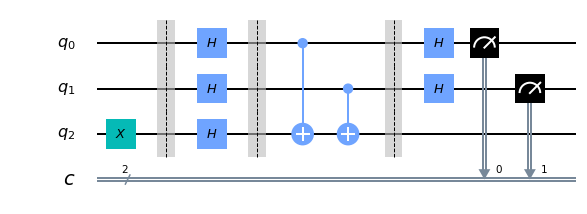

In [4]:
djCircuit.draw(output='mpl')

### 3a. Experiment with Simulators <a id='simulation'></a>

We can run the above circuit on the simulator. 

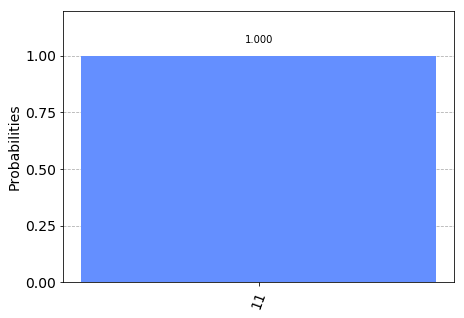

In [5]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(djCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

We can see that the result of the measurement is $11$ as expected.

### 3b. Experiment with Real Devices <a id='device'></a>

We can run the circuit on the real device as shown below. We first look for the least-busy device that can handle our circuit.

In [6]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_16_melbourne


In [7]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(djCircuit, backend=backend, shots=shots)

job_monitor(job, interval = 2)

Job Status: job has successfully run


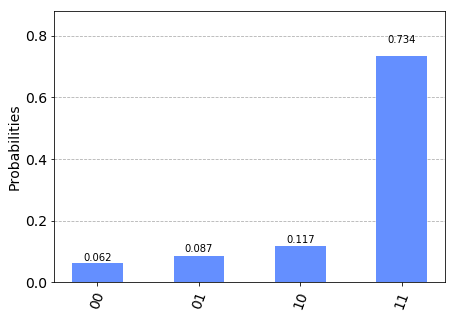

In [8]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

As we can see, most of the results are $11$. The other results are due to errors in the quantum computation. 

## 4. Problems <a id='problems'></a>

1. The above [implementation](#implementation) of Deutsch-Josza is for a balanced function with a two bit input of $a = 3$. Modify the implementation for a constant function. Are the results what you expect? Explain.
2.  Modify the [implementation](#implementation) above for a balanced function with a 4-bit input of $a = 13$. Are the results what you expect? Explain.

## 5. References <a id='references'></a>

1. David Deutsch and Richard Jozsa (1992). "Rapid solutions of problems by quantum computation". Proceedings of the Royal Society of London A. 439: 553–558.  [doi:10.1098/rspa.1992.0167](https://doi.org/10.1098%2Frspa.1992.0167).
2. R. Cleve; A. Ekert; C. Macchiavello; M. Mosca (1998). "Quantum algorithms revisited". Proceedings of the Royal Society of London A. 454: 339–354. [doi:10.1098/rspa.1998.0164](https://doi.org/10.1098%2Frspa.1998.0164).

In [9]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.11.1',
 'qiskit-aer': '0.3.4',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.5',
 'qiskit-aqua': '0.6.2',
 'qiskit': '0.14.1'}